<span style="color:#011f4b">Because data is often taken from multiple sources which are normally not too reliable and that too in different formats, more than half our time is consumed in dealing with data quality issues when working on a machine learning problem. It is simply unrealistic to expect that the data will be perfect. There may be problems due to human error, limitations of measuring devices, or flaws in the data collection process.

<span style="color:#011f4b; font-size:16px;"><b>Missing values (Пропущенные значения)</b></span>

<span style="color:#011f4b">It is very much usual to have missing values in your dataset. It may have happened during data collection, or maybe due to some data validation rule, but regardless missing values must be taken into consideration.</span>
<li>Eliminate rows with missing data :
Simple and sometimes effective strategy. Fails if many objects have missing values. If a feature has mostly missing values, then that feature itself can also be eliminated<span style="color:#00a0e5"> (Если пропущенных немного - можно удалить именно эти строки, но если много, скажем, больше 50% - придется удалить весь столбец). </span></li>
<li>If only a reasonable percentage of values are missing, then we can also run si/spanmple interpolation methods to fill in those values. However, most common method of dealing with missing values is by filling them in with the mean, median or mode value of the respective feature <span style="color:#00a0e5">(Если же пропущено только небольшой процент значений, обычно от 5% до 20%, их имеет смысл воостановить. Популярные методы - заполнение арифметической средней, модой или медианой).</span></li>

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

In [344]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<b>Inline</b> your matplotlib

In [345]:
#Run this cell - Запустите эти ячейки SHFT+Enter
%matplotlib inline

In [346]:
# Run this cell - Запустите эти ячейки SHFT+Enter
dataset = pd.read_csv("data/House_Prices.csv", index_col='Id')
dataset.head(10)

,Street,Alley,Utilities,LotFrontage,YearBuilt,YearRemodAdd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,PoolArea,PoolQC,Fence,SalePrice
Id,,,,,,,,,,,,,,,,
1,Pave,NaN,AllPub,65.0,2003,2003,0,NaN,Attchd,2003.0,RFn,2,0,NaN,NaN,208500
2,Pave,NaN,AllPub,80.0,1976,1976,1,TA,Attchd,1976.0,RFn,2,0,NaN,NaN,181500
3,Pave,NaN,AllPub,68.0,2001,2002,1,TA,Attchd,2001.0,RFn,2,0,NaN,NaN,223500
4,Pave,NaN,AllPub,60.0,1915,1970,1,Gd,Detchd,1998.0,Unf,3,0,NaN,NaN,140000
5,Pave,NaN,AllPub,84.0,2000,2000,1,TA,Attchd,2000.0,RFn,3,0,NaN,NaN,250000
6,Pave,NaN,AllPub,85.0,1993,1995,0,NaN,Attchd,1993.0,Unf,2,0,NaN,MnPrv,143000
7,Pave,NaN,AllPub,75.0,2004,2005,1,Gd,Attchd,2004.0,RFn,2,0,NaN,NaN,307000
8,Pave,NaN,AllPub,NaN,1973,1973,2,TA,Attchd,1973.0,RFn,2,0,NaN,NaN,200000
9,Pave,NaN,AllPub,51.0,1931,1950,2,TA,Detchd,1931.0,Unf,2,0,NaN,NaN,129900


So, here we see that you will work with dataset about House Prices and conditions. (<span style="color:#00a0e5">Сегодня вы работаете с данными о продаже домов и их состояния а момент продажи</span>)

Here, you can see the description for this dataset (<span style="color:#00a0e5">Для понимания здесь вы найдете описание фич</span>)

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* LotFrontage: Linear feet of street connected to property
* Street: Type of road access
* Alley: Type of alley access
* Utilities: Type of utilities available
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality

<h3>TASK 1: Data observation </h3>

<b>Task 1.1 </b> Take a closer look to your column values. Use <code>dataset.info()</code> (<span style="color:#00a0e5"> Самое время понять с какими данными вы будете работать, используйте указанные методы чтобы иметь общее представление о данных.</span>)

In [347]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
Street          1460 non-null object
Alley           91 non-null object
Utilities       1460 non-null object
LotFrontage     1201 non-null float64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
Fireplaces      1460 non-null int64
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageCars      1460 non-null int64
PoolArea        1460 non-null int64
PoolQC          7 non-null object
Fence           281 non-null object
SalePrice       1460 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 193.9+ KB


## SUMMARY
#### Categorical columns (``8``): <br>
<li> Street </li>
<li> Alley </li>
<li> Utilities </li>
<li> FireplaceQu </li>
<li> GarageType  </li>
<li> GarageFinish </li>
<li> PoolQC   </li>
<li> Fence </li>

#### Numerical columns (``9``): <br>
<li> Id </li>
<li> LotFrontage </li>
<li> YearBuilt  </li>
<li> YearRemodAdd </li>
<li> YearRemodAdd  </li>
<li> GarageYrBlt  </li>
<li> GarageCars  </li>
<li> PoolArea  </li>
<li> SalePrice  </li>

<b> Task 1.2</b> Differentate categorical and numerical values as <code>data_cat</code> and <code>data_num</code> 
 (<span style="color:#00a0e5"> Разделите ваши категориальные и числовые данные на два датафрейма - <code>data_cat</code> и <code>data_num</code> .</span>)

In [348]:
dcat = dataset.loc[:, dataset.dtypes == object]
dnum = dataset[dataset.describe(exclude='object').columns]

<b>Awesome</b>, now you can perform some observation over your dataframe
<br/> 

<b> Task 1.3 </b> Identify NaNs and it's precentage in columns  (<span style="color:#00a0e5"> Определите процентное содержание NaN в столбцах.</span>)

NaN (nan, NAN) - stand for not-a-number, in pandas dataframe NaN means that the value was missing (absent).  (<span style="color:#00a0e5"> NaN - это не-число, в даатфрейме пандас если вы встречаете NaN - значит в файле откуда вы считали данных - запись отсутствовала для данной ячейки - т.е. это пропущенное (пустое) значение.</span>)

In [349]:
drop_cols= list()
rep_cols = list()
del_cols = list()
for i in dataset.columns:
    per = round(100*dataset[i].isna().sum()/1460)
    print(f' {i}  {per}')
    if per >= 30:
        drop_cols.append(i)
    elif per <= 5:
        del_cols.append(i)
    else:
        rep_cols.append(i)

 Street  0.0
 Alley  94.0
 Utilities  0.0
 LotFrontage  18.0
 YearBuilt  0.0
 YearRemodAdd  0.0
 Fireplaces  0.0
 FireplaceQu  47.0
 GarageType  6.0
 GarageYrBlt  6.0
 GarageFinish  6.0
 GarageCars  0.0
 PoolArea  0.0
 PoolQC  100.0
 Fence  81.0
 SalePrice  0.0


<b>Task 1.4</b> Check unique values for categorical columns and ranges for numerical columns.  (<span style="color:#00a0e5"> Определите уникальные значение для категориальных данных и диапазон данных для числовых</span>)

In [350]:
print('Numerical:')
for i in dnum.columns:
    print(f'{i}  {dnum[i].max() - dnum[i].min()}')
print('\nCategorical:')
for i in dcat.columns:
    print(f'{i}  {dcat[i].nunique()}')

Numerical:
LotFrontage  292.0
YearBuilt  138
YearRemodAdd  60
Fireplaces  3
GarageYrBlt  110.0
GarageCars  4
PoolArea  738
SalePrice  720100

Categorical:
Street  2
Alley  2
Utilities  2
FireplaceQu  5
GarageType  6
GarageFinish  3
PoolQC  3
Fence  4


Awesome, now you have some understanding what is the data about.  (<span style="color:#00a0e5"> Класс, теперь у вас есть общее понимание - о чем ваши данные и какие значения они могут принимать.</span>)

<h3> Data preparation </h3

<b>Task 2.1</b> Explore the means, medians , weighted means - if needed, modes for numerical data.  (<span style="color:#00a0e5"> Посмотрите какие средние значения, мода, медиана для числовых данных.</span>)

In [351]:
dnum.describe()

,LotFrontage,YearBuilt,YearRemodAdd,Fireplaces,GarageYrBlt,GarageCars,PoolArea,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,1971.267808,1984.865753,0.613014,1978.506164,1.767123,2.758904,180921.195890
std,24.284752,30.202904,20.645407,0.644666,24.689725,0.747315,40.177307,79442.502883
min,21.000000,1872.000000,1950.000000,0.000000,1900.000000,0.000000,0.000000,34900.000000
25%,59.000000,1954.000000,1967.000000,0.000000,1961.000000,1.000000,0.000000,129975.000000
50%,69.000000,1973.000000,1994.000000,1.000000,1980.000000,2.000000,0.000000,163000.000000
75%,80.000000,2000.000000,2004.000000,1.000000,2002.000000,2.000000,0.000000,214000.000000
max,313.000000,2010.000000,2010.000000,3.000000,2010.000000,4.000000,738.000000,755000.000000


<b> Task 2.1.1</b> Create a histogram for numerical data - you can use <code>matplotlib</code> or <code>.plot</code> function of pandas  (<span style="color:#00a0e5"> Постройте гистограмму для числовых данных - вы можете использовать matplotlib или .plot функцию от пандас</span>)

Example,

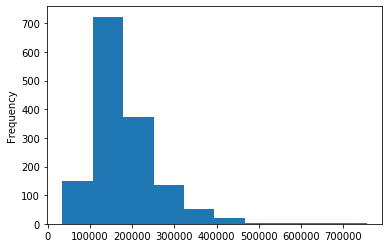

In [352]:
dataset.SalePrice.plot(kind = 'hist')

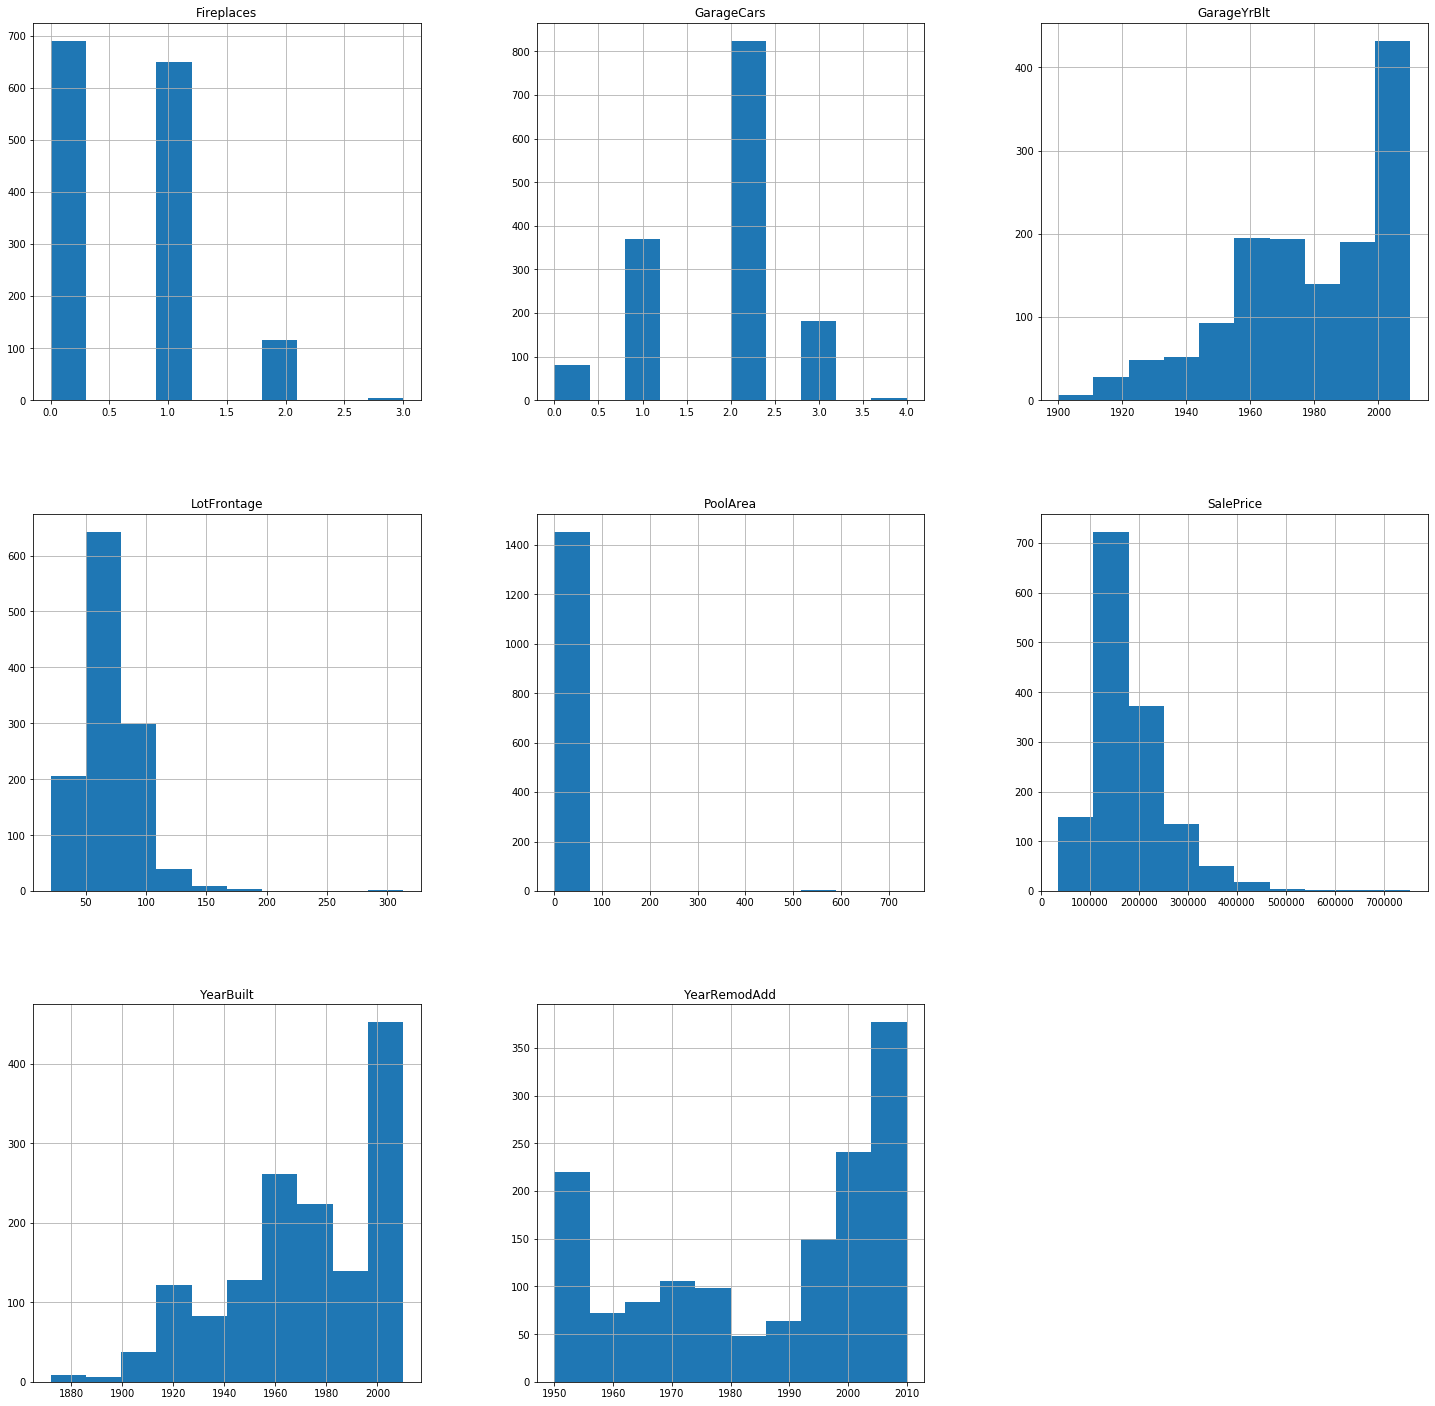

In [353]:
dnum.hist(figsize=(25,25));

<b>Task 2.2</b> Fill NaNs for numerical columns. Use the rule - if its more than 30% - delete the column, if less than 5% - delete rows, if more than 5% and less than 30% - restore.
 (<span style="color:#00a0e5"> Как вы заметили в некоторых столбцах есть пропущенные значения - их надо будет заполнить. Используйте правило 5%-30% процентов, если пропущенных меньше 5% - эти строки надо удалить, если больше - восстановить.</span>)

In [354]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
Street          1460 non-null object
Alley           91 non-null object
Utilities       1460 non-null object
LotFrontage     1201 non-null float64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
Fireplaces      1460 non-null int64
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageCars      1460 non-null int64
PoolArea        1460 non-null int64
PoolQC          7 non-null object
Fence           281 non-null object
SalePrice       1460 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 193.9+ KB


In [355]:
dataset.drop(drop_cols, axis=1, inplace=True)
for c in rep_cols:
    if dataset[c].dtype != 'object':
        dataset[c] = dataset[c].fillna(dataset[c].fillna(0))
    else:
        dataset[c] = dataset[c].fillna(dataset[c].median)
dataset[del_cols] = dataset[del_cols].dropna()
cat_cols = dataset.dtypes[dataset.dtypes == object].index

<b>TASK 3</b> Categorical values - Feature Encoding

On this section you will need to work with Categorical Features - select 3 categorical feature and think about encoding system for them. (<span style="color:#00a0e5"> Нельзя просто взять и использовать категориальные данные в линейных моделях - их нужно кодировать в числовые. В этом задании вам нужно будет подумать и решить как вы будете кодировать ваши категориальные данные.</span>)
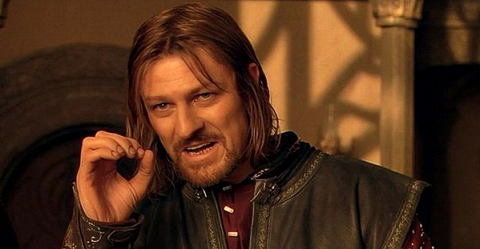

Here is some [help](https://pbpython.com/categorical-encoding.html)

In [341]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [361]:
dataset[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 4 columns):
Street          1460 non-null object
Utilities       1460 non-null object
GarageType      1460 non-null object
GarageFinish    1460 non-null object
dtypes: object(4)
memory usage: 57.0+ KB


In [366]:
lab = LabelEncoder()
for c in cat_cols:
    dataset[c] = dataset[c].astype(str)
    dataset[c] = lab.fit_transform(dataset[c])
dataset

,Street,Utilities,LotFrontage,YearBuilt,YearRemodAdd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,PoolArea,SalePrice
Id,,,,,,,,,,,,
1,1,0,65.0,2003,2003,0,2,2003.0,2,2,0,208500
2,1,0,80.0,1976,1976,1,2,1976.0,2,2,0,181500
3,1,0,68.0,2001,2002,1,2,2001.0,2,2,0,223500
4,1,0,60.0,1915,1970,1,6,1998.0,3,3,0,140000
5,1,0,84.0,2000,2000,1,2,2000.0,2,3,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1,0,62.0,1999,2000,1,2,1999.0,2,2,0,175000
1457,1,0,85.0,1978,1988,2,2,1978.0,3,2,0,210000
1458,1,0,66.0,1941,2006,2,2,1941.0,2,1,0,266500


<b>TASK 4</b> Visualizations

<b>Task 4.1</b> Visualize at least 3 categorical features

Text(0, 0.5, 'Year Build')

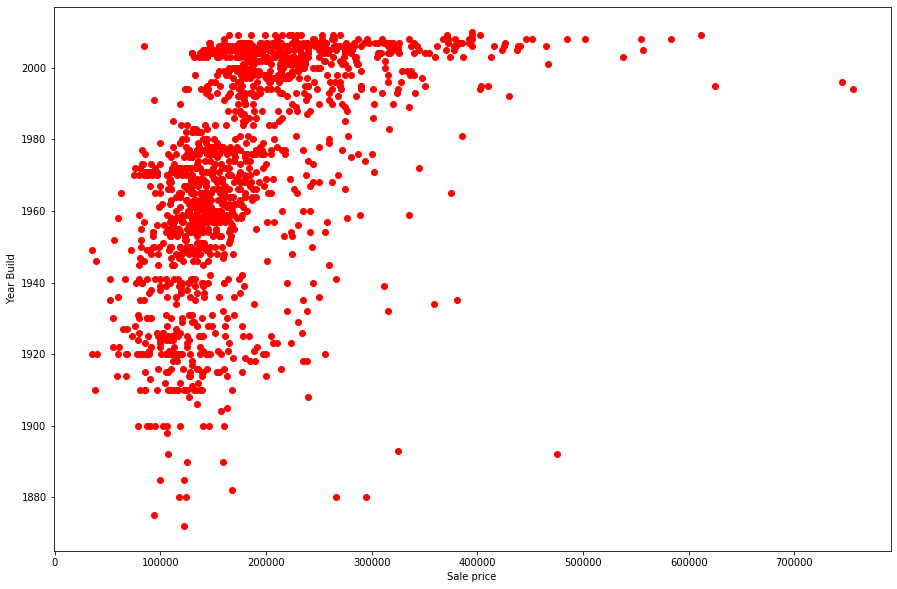

In [374]:
fig = plt.figure(figsize=(15,10))
plt.plot(dataset['SalePrice'], dataset['YearBuilt'], 'ro');
plt.xlabel("Sale price")
plt.ylabel('Year Build')

Text(0, 0.5, 'Garage Cars')

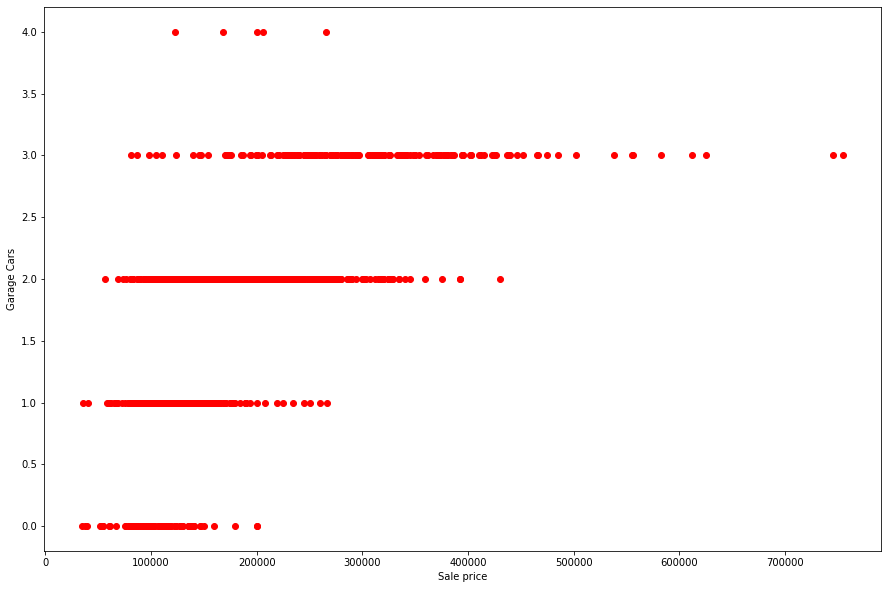

In [145]:
fig = plt.figure(figsize=(15,10))
plt.plot(dataset['SalePrice'], dataset['GarageCars'], 'ro');
plt.xlabel("Sale price")
plt.ylabel('Garage Cars')

Text(0, 0.5, 'Pool Area')

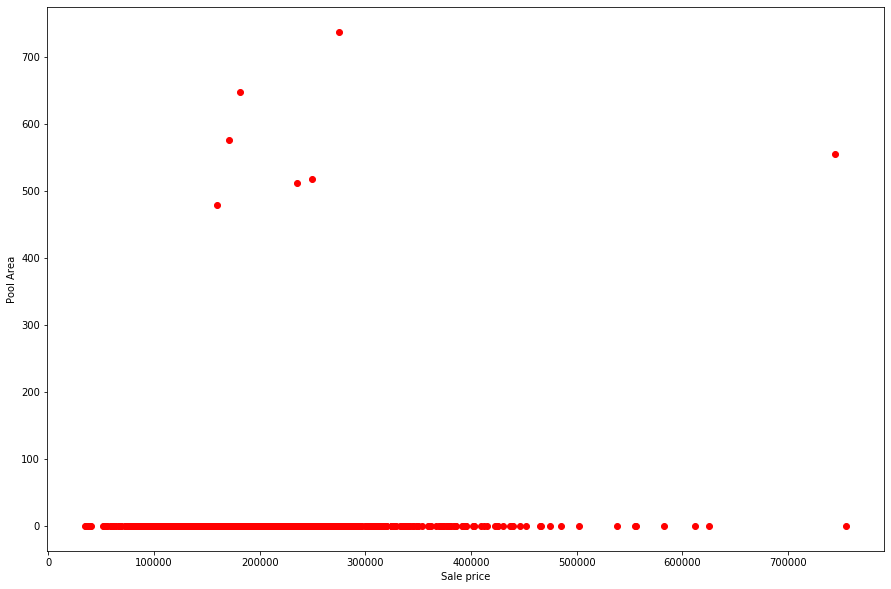

In [146]:
fig = plt.figure(figsize=(15,10))
plt.plot(dataset['SalePrice'], dataset['PoolArea'], 'ro');
plt.xlabel("Sale price")
plt.ylabel('Pool Area')

<b> Task 4.2</b> Create boxplots for any 3 numerical features and investigate if there are possible outliers

Example, 

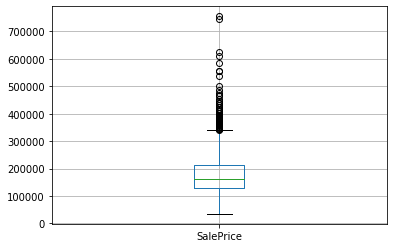

In [147]:
dataset.boxplot('SalePrice')

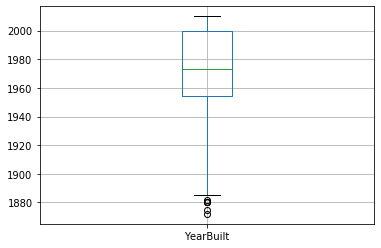

In [148]:
dataset.boxplot('YearBuilt');

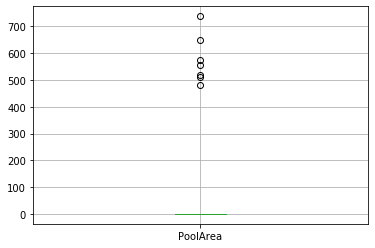

In [149]:
dataset.boxplot('PoolArea')

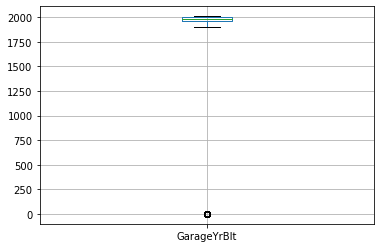

In [150]:
dataset.boxplot('GarageYrBlt')

<span style="color:#011f4b">In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

<span style="color:#011f4b; font-size:16px;"><b>Label Encoder</b></span>

<span style="color:#011f4b">This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only.
</span>

<span style="color:#011f4b"><b>Label Encoding in Python</b> can be achieved using <code>Sklearn Library</code>. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.
<br/>
Example, </span>

<span style="color:#011f4b"> Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called <b>‘One-Hot Encoding’</b>. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of bridge type and safety levels with one-hot encoding.</span>

Use this [help](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) to perform Label Encoding and One-Hot Encoding on your categorical data

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

In [367]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<b>Inline</b> your matplotlib

In [368]:
#Run this cell - Запустите эти ячейки SHFT+Enter
%matplotlib inline

<b> Task 00 </b>

Copy your Tasks 1-4 from Laboratory Work 04 (<span style="color:#00a0e5">Скопируйте все задания с Лабораторной работы 4</span>)

If you haven't finish your Task 3 - you can use help link above (<span style="color:#00a0e5"> Если вы не выполнили Задание 3 - можете воспользоваться подсказкой по ссылке в начале файла</span>)

<b> Task 5 </b> Patterns in your data (Зависимости в данных)

More advanced statistical analysis aims to identify patterns in data, for example, whether there is a link between two variables, or whether certain groups are more likely to show certain attributes.
<br/> <br/> We often collect data so that we can find patterns in the data, like numbers trending upwards or correlations between two sets of numbers.
Depending on the data and the patterns, sometimes we can see that pattern in a simple tabular presentation of the data. Other times, it helps to visualize the data in a chart, like a time series, line graph, or scatter plot.

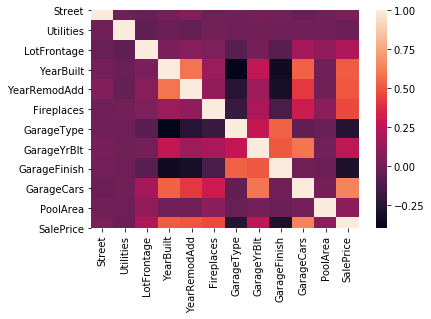

In [375]:
import seaborn as sns
sns.heatmap(dataset.corr())

GarageBuilt and GarageFinish are redundant <br>
GarageCars and YearBuilt has a great influence on Target